#### some instructions:
1. External functions must have their own files .py and then imported in this main notebook
2. Upload notebook with cells already run before handing in the HW
3. Add to readme.md the link to the notebook as well

### Importing all necessary libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## RQ1 EDA of dataset
### Reading the dataset from csv file

In [3]:
df = pd.read_csv('dataset/steam_reviews.csv')

In [41]:
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


### Starting EDA
##### Summary of dataset structure

In [42]:
df.shape

(21747371, 23)

In [43]:
# number of features, names, and dtypes
# total of each dtype and memory usage of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

##### Summary statistics

In [8]:
# statistics of each feature of df
df.describe()

,Unnamed: 0,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.172169e+07,2.174737e+07
mean,1.087369e+07,3.928181e+05,5.187500e+07,1.544432e+09,1.547556e+09,4.044689e+05,1.267917e+05,1.654424e-01,1.308768e-01,7.656120e+16,1.011300e+06,4.044775e+05,1.609105e+04,1.555421e+02,8.807421e+03,1.580505e+09
std,6.277927e+06,2.480977e+05,2.084267e+07,5.812194e+07,5.689899e+07,1.333741e+09,2.333553e+07,2.434006e-01,2.199398e+00,3.179438e+08,2.108829e+09,1.333741e+09,3.743057e+04,7.300488e+02,2.388553e+04,4.676178e+07
min,0.000000e+00,7.000000e+01,4.300000e+01,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.436844e+06,2.427600e+05,3.639355e+07,1.510223e+09,1.511729e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.200000e+01,2.000000e+00,1.250000e+03,0.000000e+00,5.590000e+02,1.573329e+09
50%,1.087369e+07,3.595500e+05,5.384058e+07,1.562446e+09,1.572189e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.100000e+01,4.000000e+00,4.307000e+03,0.000000e+00,1.881000e+03,1.599058e+09
75%,1.631053e+07,5.780800e+05,6.928793e+07,1.589696e+09,1.591403e+09,1.000000e+00,0.000000e+00,4.827586e-01,0.000000e+00,7.656120e+16,1.450000e+02,1.000000e+01,1.491200e+04,0.000000e+00,6.823000e+03,1.609002e+09
max,2.174738e+07,1.291340e+06,8.521867e+07,1.611426e+09,2.283383e+09,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06,1.611434e+09


##### Check for missing values per column in dataset

In [44]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

review                            33748
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

##### Check for duplicates

In [45]:
# Making sure there are no duplicates in df 
df.duplicated().sum()

0

##### Dropping missing values for users who never played because their reviews do not interest us

In [4]:
# This also drops the author.playtime_last_two_weeks  author.playtime_at_review nan values as they are equal to 
# author.playtime_forever nan's values, and if a user never played, it means these 2 other values are gonna be nan too
df.dropna(subset=['author.playtime_forever'], inplace=True)

##### Imputing missing values for column reviews


In [5]:
# To avoid loss of information
df['review'].fillna(' ', inplace=True)

/var/folders/zf/wylf1g6j40g9pz8j5wtw1hhw0000gn/T/ipykernel_2999/2139766395.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review'].fillna(' ', inplace=True)


##### Imputing missing values for author.playtime_at_review

In [6]:
# WOULD HAVE BEEN NICE TO Fill with average playtime at review of each different user to preserve the context of each user's behavior 
# to avoid loss of information BUT took too much time, so used mean for everyone e via
df['author.playtime_at_review'].fillna(df['author.playtime_at_review'].mean(), inplace=True)

/var/folders/zf/wylf1g6j40g9pz8j5wtw1hhw0000gn/T/ipykernel_2999/4115257975.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['author.playtime_at_review'].fillna(df['author.playtime_at_review'].mean(), inplace=True)


##### Visualization of distributions for numerical features of df

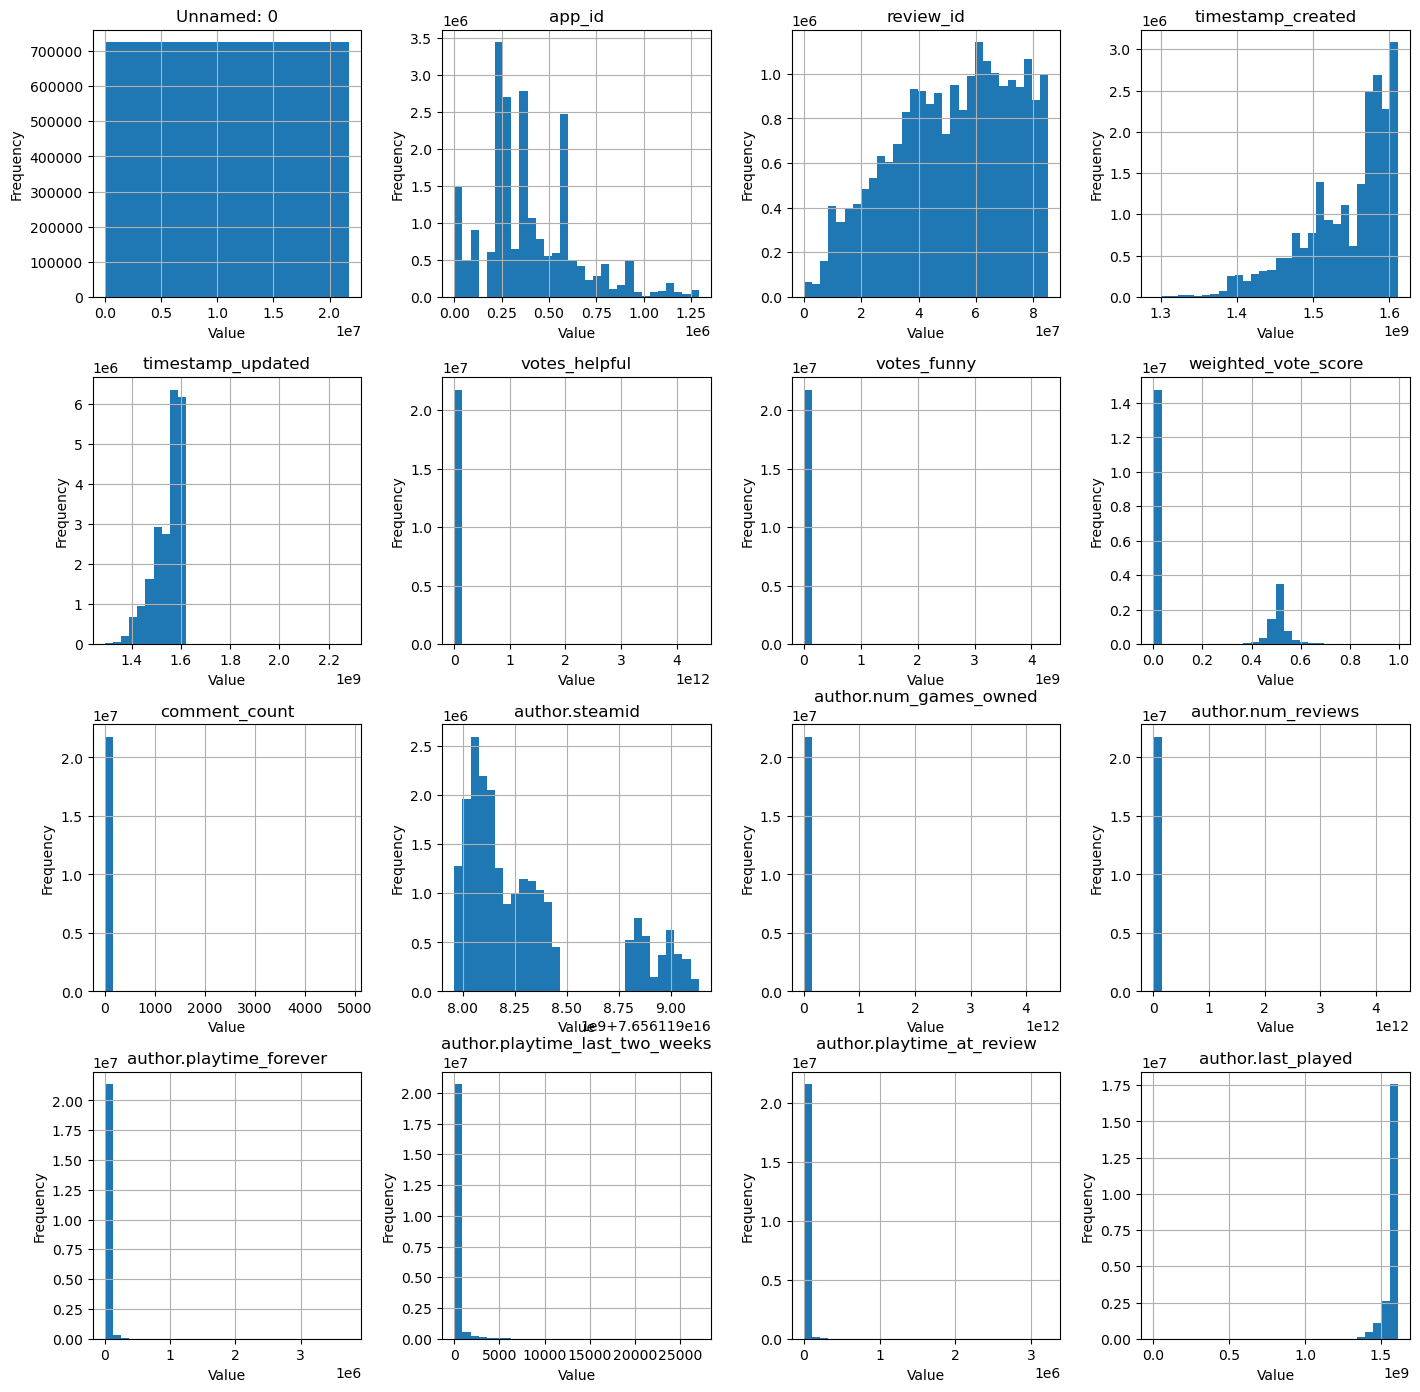

In [10]:
# Plot histograms for each column
axes = df.hist(figsize=(17, 17), bins=30)

# Setting labels for clarity
for ax in axes.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")  

plt.show()


##### Correlation heatmap for numerical features

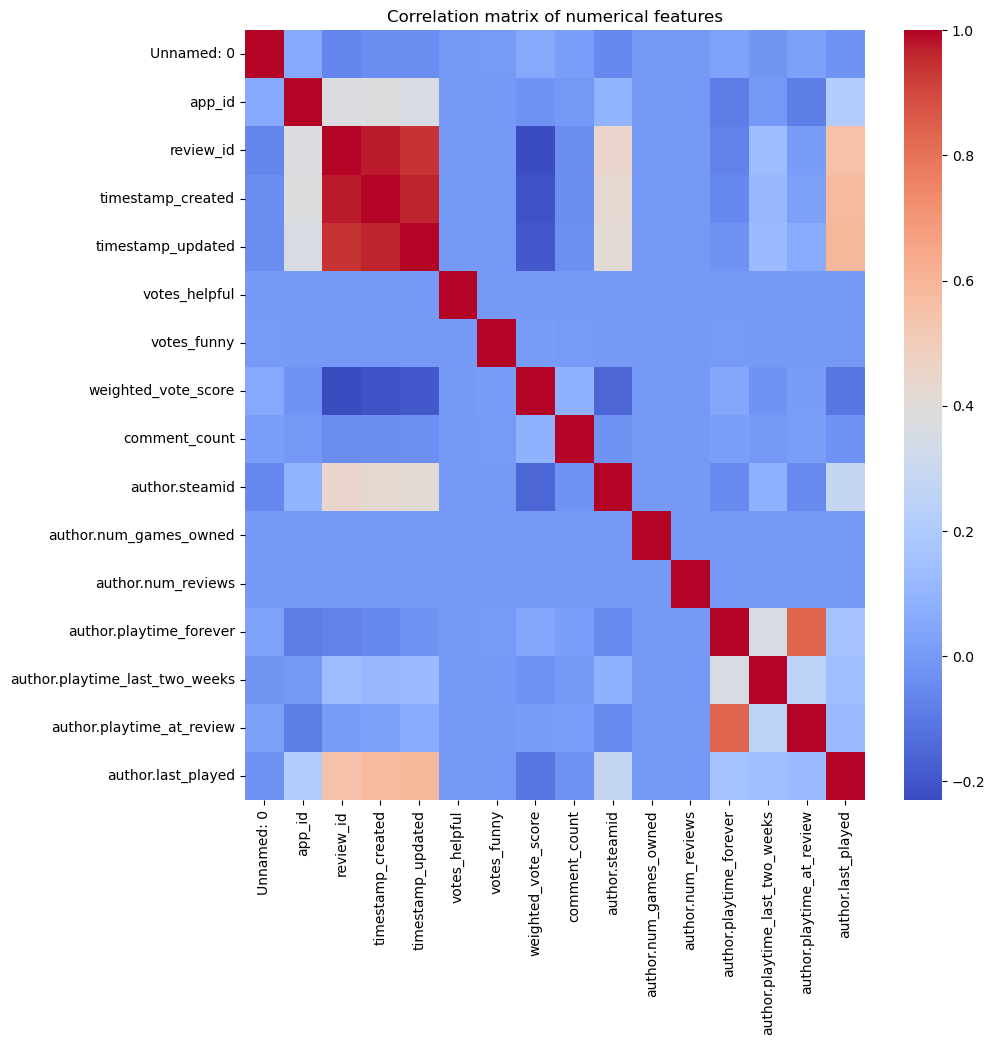

In [49]:
# taking only numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 10)) 
plt.title("Correlation matrix of numerical features")

sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.show()

##### Sns pairplot analysis for features that interest the analysis

In [7]:
# Sample df because execution time is very high
df_sample = df.sample(n=20000, random_state=42)

0.5949438524454083

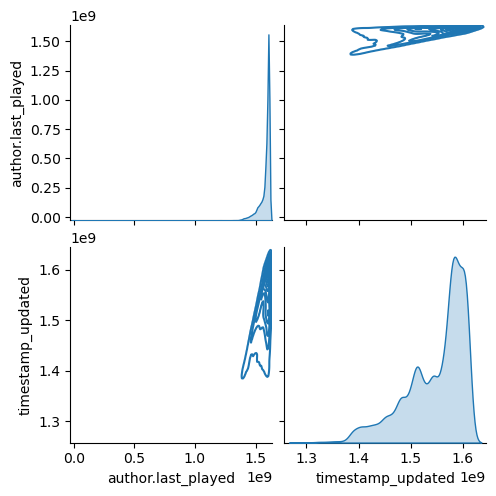

In [50]:
# analyse if when a user last played a game, he updated his review about it
sns.pairplot(df_sample, vars=['author.last_played', 'timestamp_updated'], kind='kde')
df['author.last_played'].corr(df['timestamp_updated']) # prints correlation value

##### Analysing recommendation rate per app

In [11]:
recommended = df.groupby('app_name')['recommended'].mean()
best = recommended.sort_values(ascending=False).head(10)

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65290 (\N{FULLWIDTH ASTERISK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


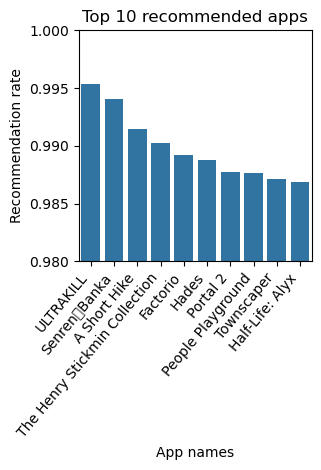

In [12]:
plt.figure(figsize=(3,3))
sns.barplot(x=best.index, y=best.values)
plt.title("Top 10 recommended apps")
plt.xticks(rotation=50, ha='right')
plt.ylim(0.98, 1)
plt.xlabel("App names")
plt.ylabel("Recommendation rate")
plt.show()

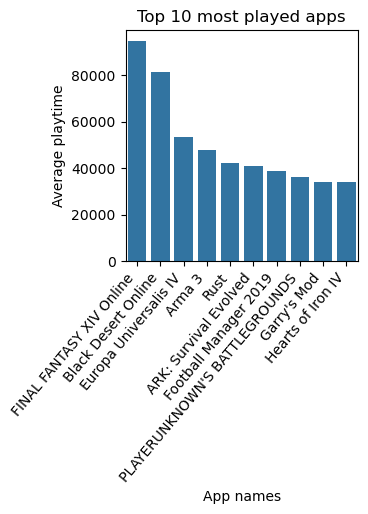

In [13]:
# Extract the most played apps
avg_playtime = df.groupby('app_name')['author.playtime_forever'].mean()
most_played = avg_playtime.sort_values(ascending=False).head(10)

plt.figure(figsize=(3,3))
sns.barplot(x=most_played.index, y=most_played.values)
plt.title("Top 10 most played apps")
plt.xticks(rotation=50, ha='right')
plt.xlabel("App names")
plt.ylabel("Average playtime")
plt.show()

##### Check if the more a user plays a game, the more he could recommend the game

Text(0.5, 1.0, 'Playtime vs. Recommendation')

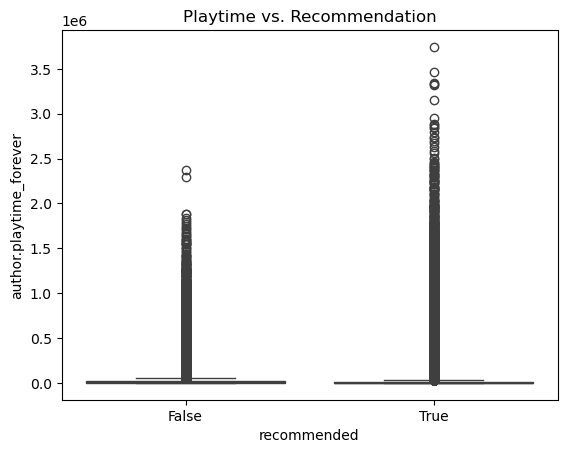

In [56]:
sns.boxplot(x='recommended', y='author.playtime_forever', data=df)
plt.title("Playtime vs. Recommendation")

/var/folders/zf/wylf1g6j40g9pz8j5wtw1hhw0000gn/T/ipykernel_2999/3608145016.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_counts.values, y=review_counts.index, palette="viridis")


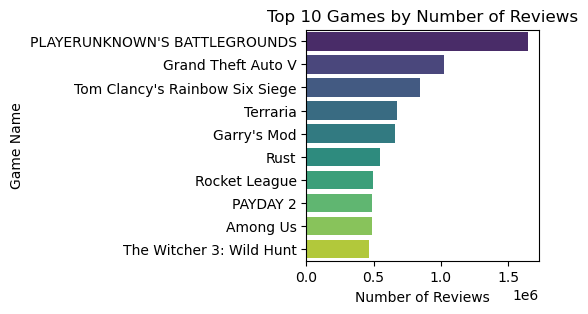

In [21]:
# count the reviews per game, and take the top 10 by review count
review_counts = df.groupby('app_name').size().sort_values(ascending=False).head(10)

# plot figure
plt.figure(figsize=(3, 3))
sns.barplot(x=review_counts.values, y=review_counts.index, palette="viridis")
plt.xlabel("Number of Reviews")
plt.ylabel("Game Name")
plt.title("Top 10 Games by Number of Reviews")
plt.show()

##### Check if most played, most recommended, or most reviewed games coincide

In [30]:
recommended_apps_set = set(best.index)
played_apps_set = set(most_played.index)
most_reviewed_set = set(review_counts.index)

# Find the common apps in different subsets
apps1 = recommended_apps_set.intersection(played_apps_set)
apps1 # Empty as the most recommended apps are not the most played apps

apps2 = recommended_apps_set.intersection(most_reviewed_set)
apps2 # Empty as the most recommended apps are not the most reviewed

apps3 = played_apps_set.intersection(most_reviewed_set)
print('Apps3')
apps3 # some most played apps are the most reviewed apps

Apps3


{"Garry's Mod", "PLAYERUNKNOWN'S BATTLEGROUNDS", 'Rust'}

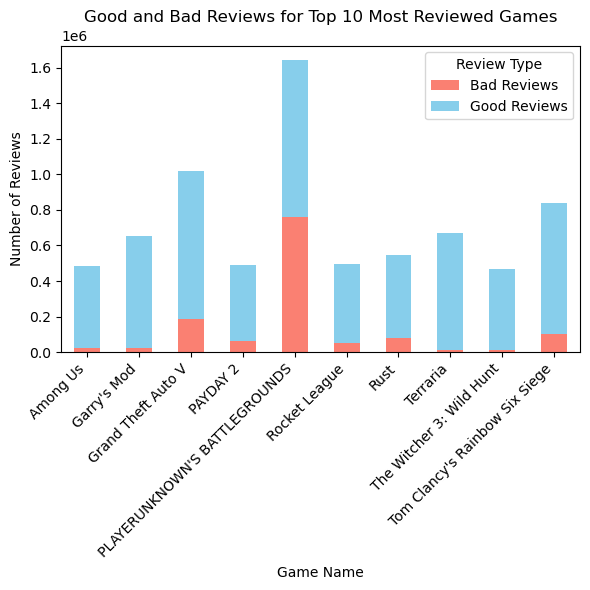

In [37]:
# Creating new df for top 10 most reviewed apps
top_10_df = df[df['app_name'].isin(review_counts.index)]

# Count Good and Bad Reviews for Each App in new df
good_bad_reviews = top_10_df.groupby(['app_name', 'recommended']).size().unstack(fill_value=0)
# Rename columns for clarity
good_bad_reviews.columns = ['Bad Reviews', 'Good Reviews']  

# Plotting figure
good_bad_reviews.plot(kind='bar', stacked=True, figsize=(6, 6), color=['salmon', 'skyblue'])
plt.xlabel("Game Name")
plt.ylabel("Number of Reviews")
plt.title("Good and Bad Reviews for Top 10 Most Reviewed Games")
plt.legend(title="Review Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## [RQ2] Analyzing the distribution of reviews across different applications.
### Applications with the highest and lowest number of reviews.

In [ ]:
# group by app_name to count how many review_id (uniqes) are there

num_reviews = df.groupby('app_name')['review_id'].count().reset_index(name='review_num')

highest_app = num_reviews.loc[num_reviews['review_num'].idxmax()]
lowest_app = num_reviews.loc[num_reviews['review_num'].idxmin()]

print(f"Application with the highest number of reviews:\n\n {highest_app}\n\n")
print(f"Application with the lowest number of reviews:\n\n {lowest_app}")


### Plot of the number of reviews for each application in descending order

In [ ]:
# sorted applications by number of reviews
num=num_reviews.sort_values( by = 'review_num', ascending = False ).reset_index(drop = True)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

num.plot(kind='bar',
         y='review_num',  # 'app_name' is no longer on the x-axis, just the index
         color='olivedrab', 
         xlabel='Applications (index)', 
         ylabel='Reviews score', 
         title='Reviews per Application', 
         ax=axes[0]
         )


axes[0].set_xticks(range(0, len(num), 10))  # Set ticks at intervals of 10
axes[0].set_xticklabels(range(0, len(num), 10))  # Label the ticks with index numbers
axes[0].set_yticks(np.arange(0, 1.8e6, 0.2e6)) 
axes[0].set_yticklabels(['0M', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M', '1.6M'])


# zooming in on the first and 100-th applications
num.iloc[[0,100]].plot(kind='bar',
         y='review_num',  
         color='olivedrab', 
         xlabel='Applications (index)', 
         ylabel='Reviews score', 
         title='First vs 100-th application reviews score',
         ax = axes[1])

axes[1].text(0, num['review_num'][0], num['review_num'][0], ha = 'center')
axes[1].text(1, num['review_num'][100], num['review_num'][100], ha = 'center')
axes[1].set_yticks(np.arange(0, 1.8e6, 0.2e6)) 
axes[1].set_yticklabels(['0M', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M', '1.6M'])


plt.show()


This bar plot suggests a high imbalance in the review counts distribution: 

- only the first (sorted) 11 applications, that is the 3,5 % of the total, have a number of applications greater or equal then 400000;

- 285 applications, that is the 90,8 % of the total, count a number of applications smaller then 200000;

- as highlighted in the zoomed plot, by the $100^{th}$ application, the review scores are less then the 3,2% of those belonging to first application.

Such insights suggest that the distribution of the number of reviews follows a long-tailed pattern, where review counts exponentialy decay as the number of applications increases. 


The inequality highlights the dominance of a few key apps in attracting user attention, with the top 5 apps accounting for a substantial share of total reviews, as shown below.

### Percentage breakdown for the top five most reviewed applications: purchased vs received for free

In [ ]:
# selecting only the rows in df whose app_name is in the top 5 most reviews and adding the review_num column merging on app
df_5 = pd.merge(df, num[:5], on = 'app_name', how = 'inner')

In [ ]:
# counting the purchased apps and the got for free ones by summing true values, grouping by app
purchased = df_5.groupby('app_name')['steam_purchase'].sum().reset_index(name='purchased_tot')
for_free = df_5.groupby('app_name')['received_for_free'].sum().reset_index(name='for_free_tot')

#merging to add the column in the respective app_name row
df_5 = pd.merge(df_5, purchased, on='app_name', how='left')
df_5 = pd.merge(df_5, for_free, on='app_name', how='left')


In [ ]:
df_5['purchased_percent'] = round((df_5['purchased_tot'] / df_5['review_num']) * 100, 2)
df_5['for_free_percent'] = round((df_5['for_free_tot'] / df_5['review_num']) * 100, 2)

In [ ]:
# select only the unique ones
df_5 = df_5.drop_duplicates(subset = ['app_name'])
df_5[['app_name', 'purchased_percent', 'for_free_percent' ]]

For the top five applications by number of reviews, the majority of reviews — an average of 83.67% — were submitted by users who purchased the application.

The percentages of purchases and applications received for free do not sum to 100% because there are users who neither purchased the application on Steam nor obtained it for free. This gap represents a category we will refer to as 'Unknown.'

The following plot illustrates the average breakdown.

In [ ]:
data = [df_5['purchased_percent'].mean(),
      df_5['for_free_percent'].mean(),
      100 - df_5['purchased_percent'].mean()- df_5['for_free_percent'].mean() ]

labels = ['Purchased', 'For free', 'Unknown'] 
plt.title(' Avarage percentage breakdown for the top 5 most reviewed applications', fontsize=14, weight='bold')

plt.pie(data, labels = labels, colors = ['rosybrown', 'olivedrab', 'saddlebrown'],
        autopct='%1.2f%%', shadow=True, wedgeprops = {"edgecolor" : "black",'linewidth': 0.8})
plt.show()


### Applications with the most and least user recommendations.

In [ ]:
# group by app_name to count how many review_id (uniqes) are there

recommendations = df.groupby('app_name')['recommended'].count().reset_index(name='recommendations_no')

most_recommended = recommendations.loc[recommendations['recommendations_no'].idxmax()]
least_recommended = recommendations.loc[recommendations['recommendations_no'].idxmin()]

print(f"Application with the highest number of recommendations:\n\n {most_recommended}\n\n")
print(f"Application with the lowest number of recommendations:\n\n {least_recommended}")

The most recommended application is the one having the highest number of reviews.

Similarly, the least recommended one is the application with the lowest number of reviews. 

This leads to the hipotesis that the two variables grow with eachother.

### Correlation between the number of recommendations and the applications' review scores

To assess the relationship between application review scores and the number of recommendations for each application, we first define 'review score' as the avarage weighted_vote_score for each application, which expresses on avarage the helpfulness of the reviews for each application.

Then, we compute its correlation with the recommendations ratio, as a measure of the likelihood of a recommendation, and with the recommendations number for each application.

Finally we test wether the results are statistically significant.


In [ ]:
# defining review scores as avg vote score per app
app_review_score = df.groupby('app_id')['weighted_vote_score'].mean()

# Total number of recommendations per app
app_total_recommendations = df.groupby('app_id')['recommended'].sum()

# Recommendation ratio per app
app_recommendation_ratio = df.groupby('app_id')['recommended'].mean()


app_metrics_df = pd.DataFrame({
    'Review Score': app_review_score,
    'Total Recommendations': app_total_recommendations,
    'Recommendation Ratio': app_recommendation_ratio
}).reset_index()

print(app_metrics_df.head())

In order to choose the most appropriate correlation measure and statistical test, we first visualize the relationship between the two pairs of variables with a scatterplot:

In [ ]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for Review Score vs Total Recommendations
sns.scatterplot(data=app_metrics_df, x='Total Recommendations', y='Review Score', ax=axs[0])
axs[0].set_title('Review Score vs Total Recommendations')
axs[0].set_xlabel('Total Recommendations')
axs[0].set_ylabel('Review Score')

# Scatter plot for Review Score vs Recommendation Ratio
sns.scatterplot(data=app_metrics_df, x='Recommendation Ratio', y='Review Score', ax=axs[1])
axs[1].set_title('Review Score vs Recommendation Ratio')
axs[1].set_xlabel('Recommendation Ratio')
axs[1].set_ylabel('Review Score')

plt.tight_layout()
plt.show()

The relationship between Review Score and Total Recommendations appears non-linear, with most data points clustered at lower values of Total Recommendations and a few outliers extending to very high values.
Given the skew and non-linear distribution, Spearman’s Rank Correlation would be more appropriate than Pearson’s correlation because these tests are non-parametric and don’t assume linear relationships.

The plot between Review Score and Recommendation Ratio shows a more dispersed, possibly monotonic pattern, with a tendency for Review Score to decrease as Recommendation Ratio increases. This pattern also suggests a non-linear or monotonic relationship.
Here, Spearman’s Rank Correlation would also be suitable, as these methods handle monotonic relationships well without assuming normality.

In [ ]:
from scipy.stats import spearsmanr

# Correlation between Review Score and Recommendation Ratio
# wether the weighted helpfulness score (average weighted_vote_score) is related to the likelihood of a recommendation, as measured by the ratio.

s_corr_ratio, s_p_value_ratio = spearsmanr(app_metrics_df['Review Score'], app_metrics_df['Recommendation Ratio'])
print(f"Spearman correlation between Review Score and Recommendation Ratio: {s_corr_ratio}, P-value: {s_p_value_ratio}")

# Correlation between Review Score and Total Recommendations
# wether apps with higher helpfulness scores receive more total recommendations.

s_corr_total, s_p_value_total = spearsmanr(app_metrics_df['Review Score'], app_metrics_df['Total Recommendations'])
print(f"Correlation between Review Score and Total Recommendations: {s_corr_total}, P-value: {s_p_value_total}")

### Interpretation of the results:

In both cases we achieve a statistically significant negative correlation.

#### Review Score vs Recommendation Ratio:
Correlation Coefficient: $-0.75$, which suggests a strong negative correlation. This means that as the recommendation ratio increases (the more an application is recommended), the review score tends to decrease (the less its revews are voted as helpful), indicating an strong monotonic relationship.

P-value: $ 4.96$ x $10^{-58}$, which is extremely small, indicating that the correlation is statistically significant. This means the observed correlation is very unlikely to be due to random chance.

#### Review Score and Total Recommendations:

Correlation Coefficient: $-0.626$, indicating a moderate negative correlation. This suggests that as the total number of recommendations increases, the review score tends to decrease.

P-value: $ 1.162$ x $10^{-35}$, also indicating statistical significance. 

The strong negative correlation between the review score and the recommendation ratio suggests that higher recommendation ratios may be associated with lower review scores. This implies that reviews reguarding higlhly recommended applications may not be rated highly.
The moderate negative correlation between the review score and total recommendations suggests that apps with a large number of recommendations do not necessarily have high review scores, possibly because higher popularity could bring more critical reviews.

## [RQ3] Understanding when users are most active in submitting reviews can help identify peak engagement periods.

### Number of reviews submitted each month

In [ ]:
# converting timestamps into date and time format: YYYY-MM-DD HH:MM:SS
# and adding it as a new column

df['date_time'] = pd.to_datetime(df['timestamp_created'], unit='s')

# creating new columns to store the month and year from date_time
#importing calendar to later convert months indexes into months names

import calendar

df['month_num'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

# First we create a new dataframe with the columns 'year', 'month_num' and 'reviews_per_month_and_year'
# obtained from the original df DataFrame, grouping by 'year' first, 'month' second
# and using the .count aggregate operator to count how many reviews per month were submitted in every year
# we used 'review_id' values to count since they are uniques

reviews_per_month_and_year = df.groupby(['year', 'month_num'])['review_id'].count().reset_index(name = 'reviews_per_month_and_year')

# sorting by years and month_num
reviews_per_month_and_year  = reviews_per_month_and_year.sort_values(by = ['year', 'month_num'])

reviews_per_month_and_year

As emerged from this output, the dataset's collection period began in November 2010 (month_num = 11) and concluded in January 2021 (month_num = 1).

As a result, the distribution of review counts for the first and last years is incomplete and skewed toward zero due to the absence of data for the full year.

To ensure the accuracy of our analysis, we will exclude these partial-year values from the final evaluation.

In [ ]:
# plot of the trend of review scores by month for each year from 2011 to 2020:

sns.lineplot( data = reviews_per_month_and_year.iloc[2:-1], x= 'month_num', y = 'reviews_per_month_and_year', marker = 'o', hue = 'year', palette = 'Spectral' )
plt.xlabel('Months')
plt.ylabel('Reviews per month')
plt.grid()
plt.legend(title = 'Year')
plt.title('Monthly Reviews Count for Different Years', fontsize=14, weight='bold')

#converting months' indexes to their actual names and adjusting the fit:

plt.xticks(ticks=range(1, 13), labels=calendar.month_name[1:])
plt.xticks(rotation=45)

# improving y axis tik frequency:

plt.yticks(ticks=np.arange(0, 1.1e6, 0.1e6), labels=['0M', '100K', '200K', '300K', '400K', '500k', '600K', '700k', '800K', '900K', '1M'])
plt.show()

In earlier years, such as 2011 and 2012, the review activity is more steady across months, without sharp increases in any specific season, and the number of reviews per month is quite low.
There is a notable increase in reviews starting from 2017, peaking in 2020, suggesting a growing user base or increasing activity in more recent years.

A clear increase in reviews in November and December can be seen across all years. This could be attributed to holiday season sales (like Black Friday, Christmas discounts, and end-of-year promotions), when people tend to purchase more games and leave reviews.
There is also a secondary peak around July in certain years, which could align with summer sales or holiday periods where users have more time to engage with games.

The activity tends to drop in January after the high in November and December. This is consistent with post-holiday trends when fewer purchases are made after the end-of-year shopping rush.
Steady Activity for Older Years:

The dataset indicates seasonal trends in user review activity, particularly a strong peak in November and December. This suggests that holiday season promotions and sales events likely drive more purchases and thus more reviews. The summer months (June to August) also show some increased activity, potentially related to summer sales. Over time, review activity has significantly grown, especially post-2017, with the largest spike seen in 2020.

### Seasonal Patterns and Trends

Using seasonal decomposition to identify the underlying trend and seasonal patterns suggested by the previous analysis.

Assumption: the observed time series follows an additive model:
$$ Observed = Trend + Seasonal + Residual $$


In [ ]:
# install statsmodels first
from statsmodels.tsa.seasonal import seasonal_decompose

# creating a column (our tme series) in the format YYYY-MM-DD, where the day is set to 1

reviews_per_month_and_year['date'] = pd.to_datetime(
    {
        'year': reviews_per_month_and_year['year'],
        'month': reviews_per_month_and_year['month_num'],
        'day': 1
    }
)

# perform seasonal decomposition
decomposition = seasonal_decompose(reviews_per_month_and_year['reviews_per_month_and_year'], model='additive', period=12)

# plot the decomposition
decomposition.plot()
plt.show()

This decomposition allows a better understanding of the changes in review activity across the year, from 2010 to 2020, measured as the total number of reviews.

The trend component shows the long-term progression. The plot indicates a steady increase in the number of reviews over time, possibly due to increased user engagement, app popularity, or other factors contributing to a steady rise in reviews.

The seasonal component captures repeating patterns within each year. It looks like there's a clear, cyclic pattern every 12 months,  with peaks and troughs occurring consistently at certain intervals, meaning the number of reviews fluctuates seasonally. Combining this result with the lineplot 'Monthly Reviews Counts for different years' we are more convinced of the pattern: increasing activity from May to July, decreasing from July to August. Pick of activity in November and subsequential decrease in the following months. 

Lastly, the residual component looks random and scattered around zero, although there is a slight increase in variance toward the end. This could mean that recent months have more irregularity in review activity, describing the unpredictable variations of our model.

### Engagement Rates

In [ ]:
#defining engagement rates as the number of reviews per month divided by the total number of reviews for that year

monthly = df.groupby(['year', 'month_num']).size().reset_index(name='monthly_reviews')
annual = df.groupby('year')['review_id'].count().reset_index(name='annual_reviews')

monthly_engagement = monthly.merge(annual, on='year')

monthly_engagement['engagement_rate'] = monthly_engagement['monthly_reviews'] / monthly_engagement['annual_reviews']

monthly_engagement

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Line plot to check spikes

sns.lineplot( data = monthly_engagement, x= 'month_num', y = 'engagement_rate', marker = 'o', hue = 'year', palette = 'tab10', ax=ax1 )
ax1.set_title('Monthly Engagement Rates for Different Years', fontsize=14, weight='bold')
ax1.set_xlabel('Months')
ax1.set_ylabel('Monthly engagement rates')
ax1.grid()
ax1.legend(title = 'Year')

#Box plot to check variability and statistical summaries

sns.boxplot(data=monthly_engagement, x='month_num', y='engagement_rate', palette="Blues", ax=ax2)
ax2.set_title('Monthly Engagement Rate Distribution by Month')
ax2.set_xlabel('Months')
ax2.set_ylabel('Engagement Rate')
ax2.grid()

plt.tight_layout()
plt.show()

The line plot shows higher engagement rates in July, November and December, replicating a similar trend and seasonal pattern to what we observed with review activity. 

the blox plot higlights variability of engagement rates across the years:

### Most common time of day for users to write reviews

In [ ]:
# Getting time only from date_time column while approximating 

df['time_bin'] = df['date_time'].dt.floor('15min').dt.time  

# Group by time_bin to count reviews at each 15-minute interval

time_counts = df.groupby('time_bin').size()

# Plotting

plt.figure(figsize=(10, 5))
time_counts.plot(kind='bar', color= 'olivedrab')  
plt.xlabel('Time of Day')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Time of Day')
xticks = range(0, len(time_counts), 4)  # Display hours only
plt.xticks(ticks=xticks, labels=[time_counts.index[i].strftime('%H:%M') for i in xticks], rotation=45)
plt.grid(True)
plt.show() 

This histogram shows the distribution of review submissions by time of the day, with each bin representing one quarter of an hour (from 0 to 23).

There is a noticeable peak in review activity around midday to early evening. The highest activity appears to be between 13 and 16, indicating that users are most active in writing reviews during this period.

Activity is lower from late night through early morning, especially around 2 AM to 7 AM. This is a common pattern as people are generally less active online during these hours, possibly sleeping or involved in offline activities.

The activity seems to gradually increase starting in the early morning and continues to build until it peaks in the afternoon, around 3 PM. After the peak period, activity declines slowly until it reaches a second pick around 6.30 PM, which may reasonably reflect an increase in users' activity due to the end of working hours. The number of reviews declines again towards the late evening, reflecting typical daily routines.

In [ ]:
#computing the exact most common time

df['review_time'] = df['date_time'].dt.strftime('%H:%M')
most_common_time = df['review_time'].mode()[0]
print(f"The most common time of day for writing reviews is: {most_common_time}")

The most common time of the day for writing reviews falls perfectly in the highest pick of the review activity histogram 'Distribution of Reviews by Time of Day'.

### Time Interval Analysis

In [ ]:
# defining a function which takes a list of time intervals and plots the number of reviews for each interval

def reviews_per_interval(time_intervals):
    
    out = []
    
    for interval in time_intervals:
        
        #converting input to datetime obj:
        start = pd.to_datetime(interval[0], format='%H:%M:%S').time()
        end = pd.to_datetime(interval[1], format='%H:%M:%S').time()

        reviews = df[(df['review_time'] >= start) & (df['review_time'] <= end)].shape[0]
        
        out.append([f"{start} - {end}", reviews])
        
    out_df = pd.DataFrame(out, columns = ['Time Interval', 'Number of Reviews'])


    # plot

    plt.figure(figsize = (12, 6))
    sns.barplot(data = out_df, x='Time Interval', y ='Number of Reviews', color = 'skyblue')
    plt.xticks(rotation = 45)
    plt.xlabel('Time Interval')
    plt.ylabel('Number of Reviews')
    plt.title('Number of Reviews per Time Interval')
    plt.grid(axis ='y')
    plt.show()

In [ ]:
#testing the function on the  given input list of time intervals

input_list = [['00:00:00','02:59:59'],['03:00:00','05:59:59'],['06:00:00','10:59:59'],
['11:00:00','13:59:59'],['14:00:00','16:59:59'],['17:00:00','19:59:59'],['20:00:00','23:59:59']]

reviews_per_interval(input_list)

Based on the time interval analysis results, we can summarize the review activity across different periods of the day:

Early Morning and Late Evening are peak times for review activity, suggesting users are most active during these hours.
Early Morning (03:00 - 05:59) sees the least activity, likely because of typical sleep patterns.
Afternoon and Evening also show moderate to high review activity, potentially aligning with breaks or end-of-day routines.

###### [RQ5] **It is interesting to explore the top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently.**

a)Determine the ten reviewers with the highest number of reviews in the dataset.<br><br>
b)What is the percentage of each language used by these top 10 reviewers when submitting a review?<br><br>
c)Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.<br><br>
d)Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

In [ ]:
### RQ5a)

df=pd.read_csv('steam_reviews.csv',usecols=lambda column: column in ['author.steamid', 'app_id','app_name','author.num_reviews','votes_helpful','language'])
# take only necessary columns for this task
df_extract=df[['author.steamid','author.num_reviews']]
# get number of reviews related to each author
grouped_df = df_extract.groupby('author.steamid')['author.num_reviews'].sum().reset_index()
# sorting
df_extract=grouped_df.sort_values('author.num_reviews',ascending=False)
# get only 10
arr_max_comments=df_extract.head(10)
# print
print(arr_max_comments)

             author.steamid  author.num_reviews
3709309   76561198103272004       4398046511108
10401099  76561198848008157       4398046511105
1849199   76561198045381877              244662
2409169   76561198062813911              241529
5055      76561197960373660              202713
3461634   76561198094803808              196877
224925    76561197974092119              190141
960101    76561198013146396              189568
1757205   76561198043049777              170072
4060710   76561198116879965              163030


In [ ]:
### RQb)
# join between 10 commentator and entire table using inner join
df_filtered = df.merge(arr_max_comments[['author.steamid']], on='author.steamid', how='inner')
df_extract=df_filtered[['language','author.num_reviews']]
#get reviews by language
df_grouped =df_extract.groupby('language')['author.num_reviews'].sum().reset_index()
# sorting it
df_extract=df_grouped.sort_values('author.num_reviews',ascending=False)
# getting all reviews
total_reviews = df_extract['author.num_reviews'].sum()
# take percentage of reviews
df_extract['percentage'] = (df_extract['author.num_reviews'] / total_reviews)*100
print(df_extract)

    language  author.num_reviews  percentage
1    english       4398047410139   50.000001
2      latam       4398046511108   49.999991
4    russian              350683    0.000004
3     polish              190141    0.000002
0  brazilian              158734    0.000002


In [ ]:
### RQ5c)
'''
Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming.
 Calculate the average number of valuable votes these reviewers received for their submitted reviews.
 Elaborate on the results you see.
'''
result = df_filtered.groupby('author.steamid').apply(lambda x: x['votes_helpful'].sum() / x['author.num_reviews'].sum()).reset_index(name='helpful_ratio')
print(result)


      author.steamid  helpful_ratio
0  76561197960373660       0.001460
1  76561197974092119       0.002235
2  76561198013146396       0.000506
3  76561198043049777       0.002223
4  76561198045381877       0.000948
5  76561198062813911       0.000547
6  76561198094803808       0.001605
7  76561198103272004       0.000000
8  76561198116879965       0.002128
9  76561198848008157       0.000000


<ipython-input-47-2e9549d20505>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df_filtered.groupby('author.steamid').apply(lambda x: x['votes_helpful'].sum() / x['author.num_reviews'].sum()).reset_index(name='helpful_ratio')


### Explanation of Results

As you can observe, the users with the highest ratio, `76561197974092119` and `76561198043049777`, contributed the best comments. User `76561198848008157` appears to have spammed, as its ratio is almost equal to 0.


In [ ]:
### RQ5d) calculation
df_extract=df_filtered[['app_name','author.num_reviews']]
# sum num of reviews based on app name
df_grouped=df_extract.groupby('app_name')['author.num_reviews'].sum().reset_index()
df_extract=df_grouped.sort_values('author.num_reviews',ascending=False)
index_array = pd.Series(range(1, len(df_extract) + 1))
# Reverse rank
reversed_array = [x for x in range(len(df_extract),0,-1)]

# Add rank to the table
df_extract.loc[:,'reversed_index'] = reversed_array
print(df_extract)


                                 app_name  author.num_reviews  reversed_index
89                     Grand Theft Auto V       4398046523457             229
169                        Stardew Valley       4398046518188             228
37                 Counter-Strike: Source               23758             227
93                              HITMAN™ 2               23751             226
53                       Dead by Daylight               21122             225
..                                    ...                 ...             ...
60        Don't Escape: 4 Days to Survive                1621               5
175                            Subnautica                1621               4
203  Total War Saga: Thrones of Britannia                1621               3
205                  Total War: WARHAMMER                1621               2
150                              RimWorld                1621               1

[229 rows x 3 columns]


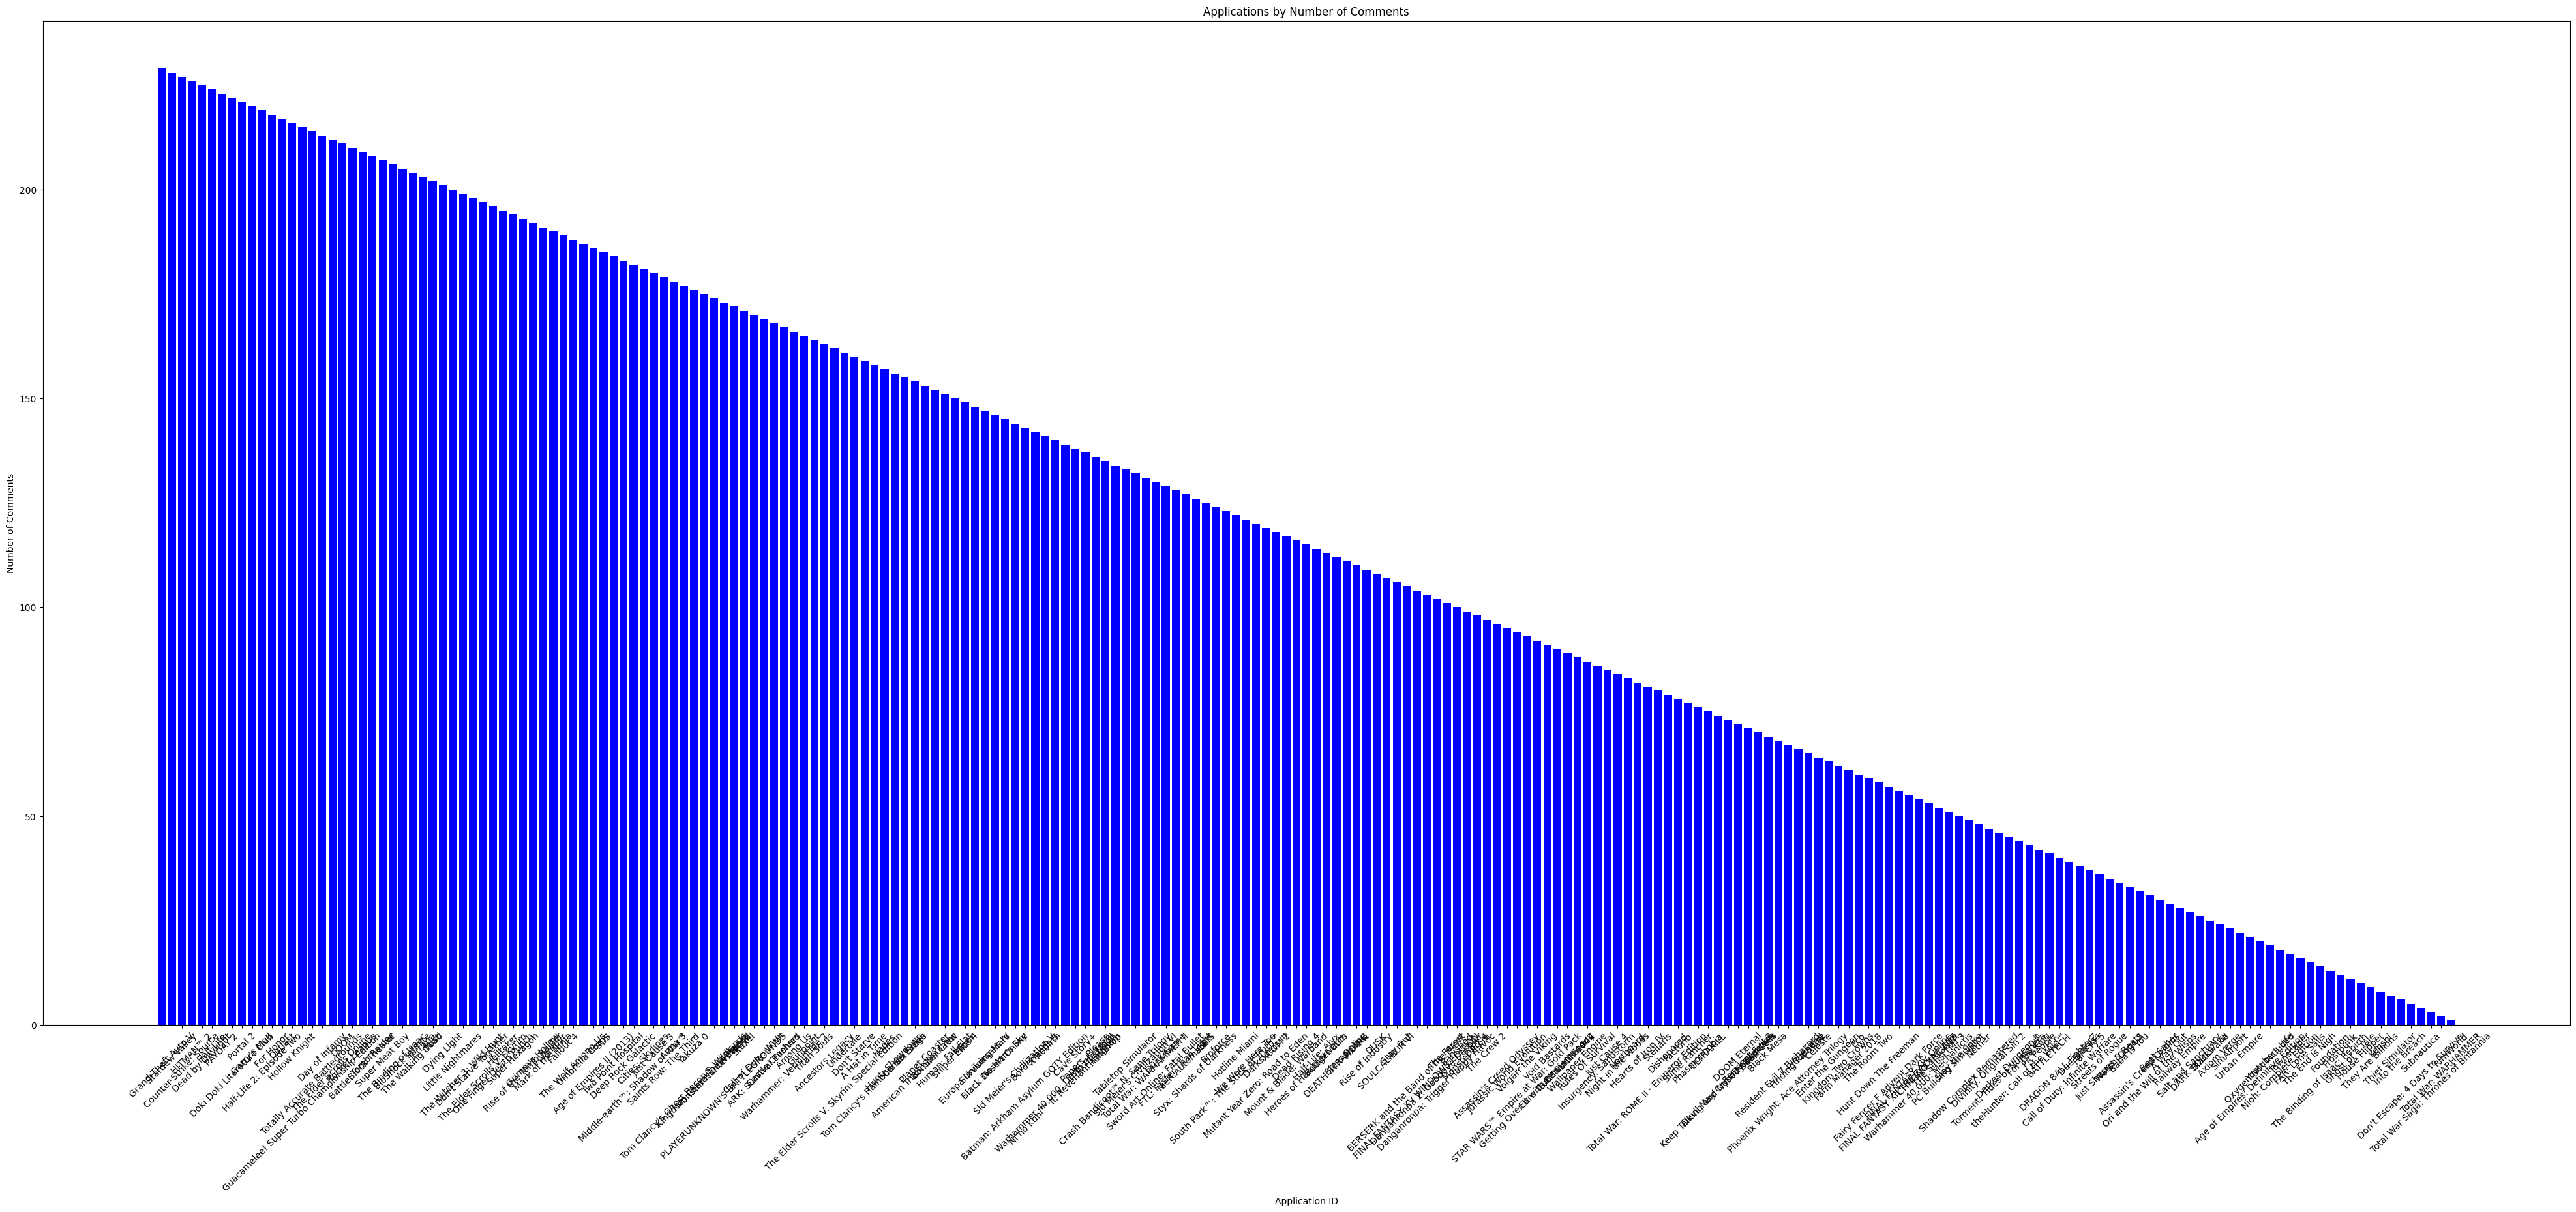

In [ ]:
# RQ5d) plotting
import matplotlib.pyplot as plt  # Correct the import to use pyplot

# Assuming df_extract is your DataFrame
plt.figure(figsize=(50, 20))
plt.bar(df_extract['app_name'], df_extract['reversed_index'], color='blue')

# Add labels and title
plt.xlabel('Application Name')
plt.ylabel('Number of Comments')
plt.title('Applications by Number of Comments')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()


##### AQ question

In [ ]:

# n - is a starting number
# k - is the number of arguments
# arr - is a list of arguments which give n
# eo - is a list of even and odd numbers
memo=dict()
global_count=0
global_array=None
def recursion(n,k,arr,eo):
    global global_count
    global global_array
    # we have this value in memo
    if tuple([n,k,eo]) in memo and memo[tuple([n,k,eo])]==set(arr):
        return memo[(n,k,eo)]
    # we don't have this value in memo
    else:
        memo[tuple([n,k,eo])]=set(arr)
    # if one of two is negative
    if n<0 or k<0:
        return 
    # base case 4 we found the answer
    if k==0 and n==0:
        global_array=arr.copy()
        global_count+= 1
        return 
    if arr==[]:
        for i in range(n,0,-1):
            arr.append(i)
            if i %2==0:
                recursion(n-i,k-1,arr,True)
            else:  
                recursion(n-i,k-1,arr,False)
            arr.pop()
            if global_count>0:
                return
    else:
        for i in range(n if (n % 2 == 0 and arr[-1]%2==0) or (n % 2 == 1 and arr[-1]%2==1) else n-1,0,-2):
            if eo:
                if i%2==0:
                    arr.append(i)
                    recursion(n-i,k-1,arr,eo)
                    arr.pop()
            else:
                if i%2!=0:
                    arr.append(i)
                    recursion(n-i,k-1,arr,eo)
                    arr.pop()
            if global_count>0:
                return

if __name__=='__main__':
    status_arr=[]
    final_arr=[]
    lines_input=int(input())-1
    for i in range(lines_input):
        n,k=map(int,input().split())
        arr=[]
        global_count=0
        global_array=None
        if n%2==0:
            eo=True
        else:
            eo=False
        recursion(n,k,arr,eo)
        if global_count>0:
            status_arr.append("YES")
            final_arr.append(global_array)
        else:
            status_arr.append("NO")
            final_arr.append([])
        global_count=0
        global_array=None
    for i in range(len(status_arr)):
        print(status_arr[i])
        if len(final_arr[i])>0:
            print(*final_arr[i])  

### Analysis of Code Time Complexity

The most computationally expensive part of the code is<br> the iteration `for i in range(n if (n % 2 == 0 and arr[-1]%2==0) or (n % 2 == 1 and arr[-1]%2==1) else n-1,0,-2)`,<br> which is called `k` times. Additionally, each of the `n` numbers triggers recursion `k` times at each level. Therefore, the worst-case time complexity should be `O((n/2)^k)` for each input line. The rest of the code does not have a significant impact on the overall complexity.<br><br>

The implementation of memoization can reduce this cost O(n/2*k). This is because there are no repeated calculations for the same input values. If we have already calculated values for the same input, the cost is reduced.



### CHATGPT
The answer is almost the same:<br>
Big O Conclusion:
Without Memoization: In the worst case, where memoization doesn't help much, the time complexity is `O(n^k)`, as the function iterates over n elements and <br>recurses `k` times.
With Memoization: Memoization reduces the number of recursive calls, but in the worst case, the complexity is `O(n * k * 2) = O(n * k)`.<br> This is because each tuple `(n, k, eo)` can only be computed once.<br>
Actually, it is not exactly the same due to the division by 2. I am not only considering odd values if I already have a value in the array (whether it’s odd or even).

